### 1. 지역별 총인구수 Top5

In [32]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
data_df = data[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False)

data_df.head(5)

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


#### 1-1. 지역별 총인구수 plot

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font_prop)

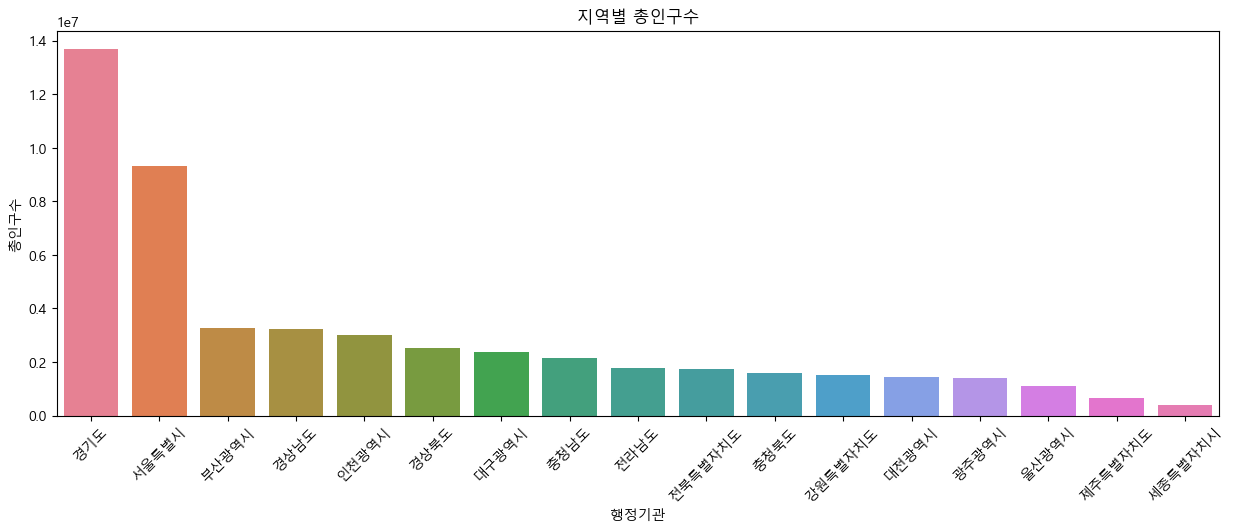

In [26]:
figure, axes = plt.subplots()
figure.set_size_inches(15,5)

sns.barplot(data=data_df.sort_values(by="총인구수", ascending=False),
            x='행정기관', y='총인구수', axes=axes, hue='행정기관')

axes.set_title('지역별 총인구수')
axes.tick_params(axis='x', rotation=45)

plt.show()

### 2. 세대당 인구수 높은 지역 Top5

In [65]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
data_df = data[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

data_df.head(5)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


#### 2-1. 지역별 세대당 인구 Plot


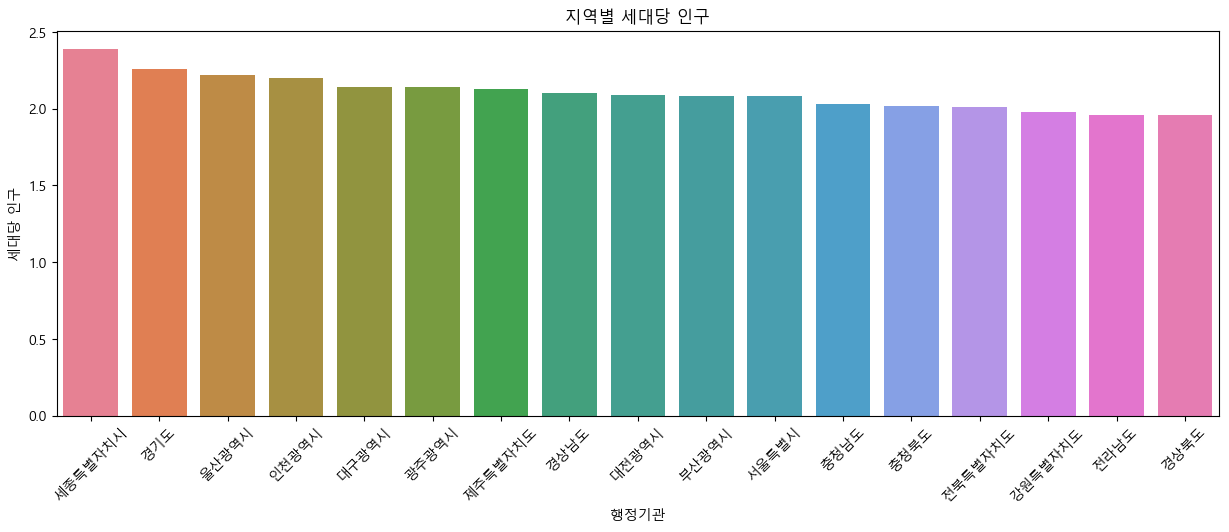

In [35]:
figure, axes = plt.subplots()
figure.set_size_inches(15,5)

sns.barplot(data=data_df.sort_values(by="세대당 인구", ascending=False),
            x='행정기관', y='세대당 인구', axes=axes, hue='행정기관')

axes.set_title('지역별 세대당 인구')
axes.tick_params(axis='x', rotation=45)

plt.show()

### 3. 남녀 비율 분석


In [63]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
data_df = data[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)

data_df

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


#### 3-1. 남녀 비율 분석 Plot


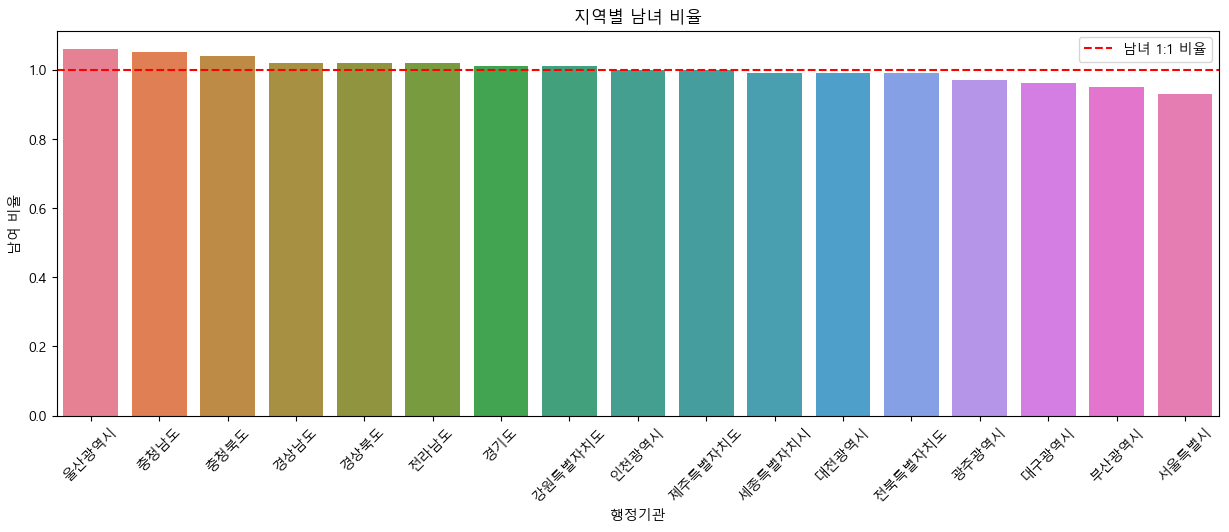

In [46]:
figure, axes = plt.subplots()
figure.set_size_inches(15,5)

sns.barplot(data=data_df.sort_values(by="남여 비율", ascending=False),
            x='행정기관', y='남여 비율', axes=axes, hue='행정기관')

axes.set_title('지역별 남녀 비율')
axes.tick_params(axis='x', rotation=45)
axes.axhline(y=1.0, color ='r', linestyle='--', label='남녀 1:1 비율')

axes.legend()
plt.show()

### 4. 남자초과 / 여자초과 분석


In [66]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
gender_ratio_df = data[['행정기관', '남여 비율']].reset_index(drop=True)
gender_ratio_df.index = data_df.index + 1

def gender_ratio(x):
    if x < 1:
        return '여초'
    elif x == 1:
        return '동일'
    else:
        return '남초'

gender_ratio_df['남초여초'] = gender_ratio_df['남여 비율'].apply(gender_ratio)

gender_ratio_df

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


### 5. 세대당 인구 평균보다 높은 지역


In [61]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
data = data.loc[data['세대당 인구'] > 2.11]
data_df = data[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

data_df

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


#### 5-1. 남초 vs 여초 개수 Plot  ( seaborn의 countplot )
#### 지역별 세대수 Plot ( seaborn의 barplot )

In [67]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
data = data[data['행정기관'] != '전국']
data_df = data[['행정기관', '세대수']].sort_values(by='세대수', ascending=False).reset_index(drop=True)

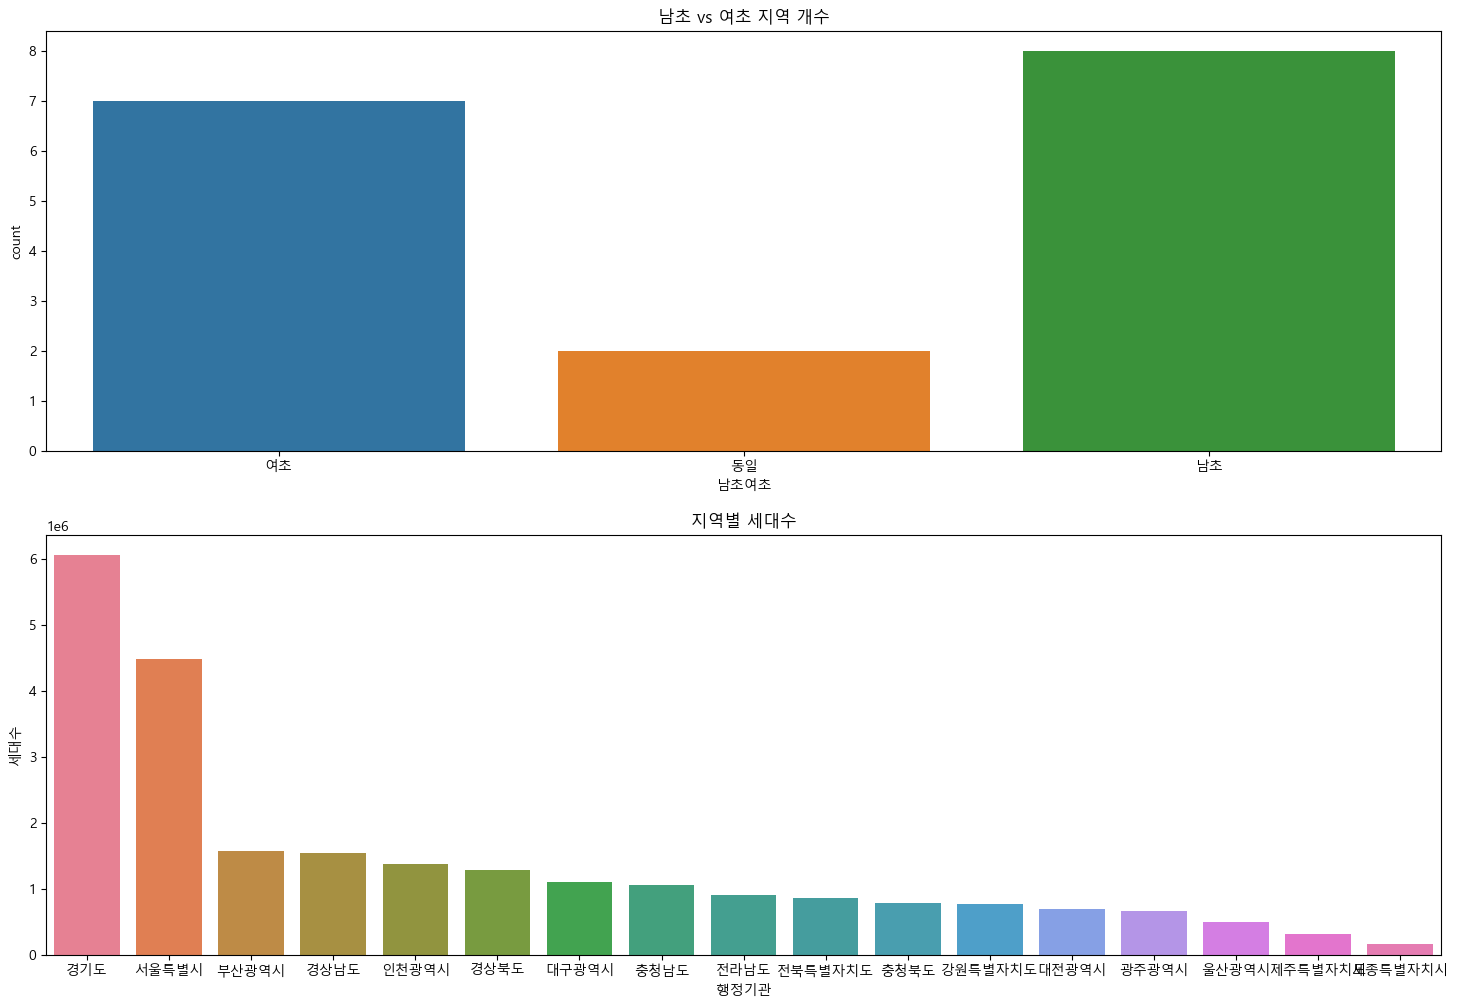

In [ ]:
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

sns.countplot (data=gender_ratio_df, x='남초여초',ax=axes1, hue='남초여초')
axes1.set_title('남초 vs 여초 지역 개수')

sns.barplot(data=data_df.sort_values(by="세대수",ascending=False),\
    x='행정기관',y='세대수',ax=axes2, hue='행정기관')
axes2.set_title('지역별 세대수')

plt.show()

### 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )


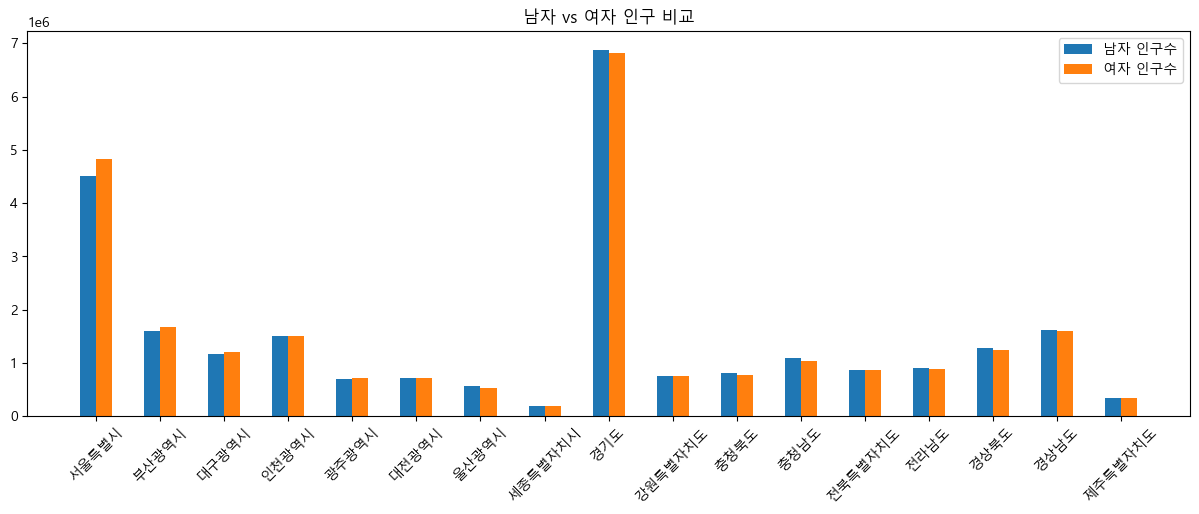

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/인구현황.csv')
data_df = data[data['행정기관'] != '전국']

index = np.array(range(len(data_df))) # x축 라벨의 위치
w = 0.25 # 막대의 너비

figure, axes = plt.subplots()
figure.set_size_inches(15,5)

axes.bar(index-w/2, data_df['남자 인구수'], w, label='남자 인구수')
axes.bar(index+w/2, data_df['여자 인구수'], w, label='여자 인구수')

axes.set_title('남자 vs 여자 인구 비교')
axes.legend()
plt.xticks(index, data_df['행정기관'], rotation=45)

plt.show()